In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize

h = 6.62607*(10**(-34))
c = 2.99792*10**8
d_lif = 2.014*10**-10
e = 1.60218*10**-19

In [13]:
zn_countdt = np.array([1891.031642,1306.451793,947.4403916,781.3336188,648.7939629,558.7530983,485.3102333,411.7104131,377.3975081,361.3835829,341.1632533,334.7926861,395.6007539,452.7241505,530.1426985,580.8569745,656.6405423,685.8768819,742.5108816,787.0643037,793.9484201,835.4209898,843.5186779,849.3094651
,904.0183399,907.5273935,936.8494101,965.1334667,985.2484895,955.6907037,960.4102386,956.8702414,968.678314,954.5113966,930.9735664,935.6737827,911.0384973,899.342788,880.6769125,853.9461357,857.4259985,838.8900839,813.4967482,806.590012,763.0324663,760.7487819,718.6585041,718.6585041,714.1260736,688.1318495,671.2405756
,632.01505,611.943448,594.1595382,591.9403425,546.6315535,538.9309455,499.4879726,490.7591104,473.340701,459.226708,419.243701,414.9377593,392.3842259,370.9865763,349.6683823,341.1632533,314.6658989,308.3247688,296.7176254,275.6740692,264.1331723,252.6156458,244.2539014,233.8190098,241.1214189,221.322427
,213.0066552,218.2025817,200.5558553,194.3407169,197.4474322,183.9973163,180.8979857,166.4569039,165.4268113,156.1644391,153.0803621,139.7355151,146.9172704,140.7609191,138.710298,133.5870137,141.78651,132.5629168,134.6112972,125.399458,126.4222503,123.3544317,112.1200796,113.1404558,110.0798837,114.1610175
,113.1404558,110.0798837,103.9637439,107.0209802,102.9450354,99.89002008,94.80202513,97.85426776,94.80202513,95.81925463,87.68658597,85.65526276,91.75144433,91.75144433,86.67083224,83.62467633,77.53733372,79.56571221,79.56571221,77.53733372,79.56571221,72.46960303,70.44379591,77.53733372,72.46960303,71.45660772
,68.41872258,64.37077567,67.40646096,66.39438263,66.39438263,67.40646096,66.39438263,67.40646096,90.73495312,142.8122879,159.2502054,160.2791698,159.2502054,149.997973,153.0803621,144.8644049,137.6852677,144.8644049,130.5152824,133.5870137,133.5870137,146.9172704,164.3969069,352.8610635,1373.002854,2913.111526
,731.140622,332.6707384,233.8190098,196.4116707,159.2502054,149.997973,138.710298,132.5629168,131.5390064,122.3321976,125.399458,122.3321976,126.4222503,115.1817649,116.2026979,120.2882876,130.5152824,155.1362258,179.8652535,252.6156458,741.3728732,8900.97619,10207.21412,1486.377705,554.3423484,280.9276765,182.9640171
,113.1404558,84.63987747,71.45660772,72.46960303,68.41872258,65.38248755,61.3367387,60.3257591,63.35924693,57.2939178,56.2836697,51.23516943,57.2939178,56.2836697,50.22601708,52.24450428,49.21704718,42.15936239,45.18299111])

sr_countdt = np.array([1097.693635,749.3435238,536.7326401,454.8908574,384.8859827,343.2883519,295.6636005,258.8950401,243.2095485,236.947463,217.163015,233.8190098,273.5739828,324.1908094,361.3835829,410.6350326,483.1321152,478.7783329,504.9501845,546.6315535
,551.0364734,558.7530983,562.0633503,557.6500982,572.0053836,575.3231591,603.0447434,596.3795756,589.7219882,562.0633503,569.7945796,551.0364734,537.8316891,537.8316891,512.6059211,507.1365086,484.221072,474.4278192,462.48073,435.419676,409.5598528,399.892257
,388.0983182,379.5360766,353.9256859,342.225704,322.0727905,313.6085548,300.9356737,285.134054,263.0851597,250.5240554,237.9906642,230.692281,213.0066552,206.777831,191.2357082,180.8979857,168.5176537,157.1928401,159.2502054,264.1331723,655.5189613
,793.9484201,823.8718756,799.691272,760.7487819,724.3289305,708.4654171,689.2596565,671.2405756,630.898158,603.0447434,607.4924063,562.0633503,553.2401818,515.8900411,501.6722408,500.580004,485.3102333,457.0583765,459.226708,427.8652432,423.5528611
,368.8511887,361.3835829,339.0389431,327.3693096,313.6085548,306.2126225,299.8808692,297.7718452,278.825652,271.4746709,251.5697544,255.7544757,247.3881131,243.2095485,226.5259893,221.322427,204.7030787,210.9296188,207.8154924,202.6290869,198.4833834,183.9973163
,179.8652535,174.7044245,166.4569039,164.3969069,161.3083221,149.997973,146.9172704,137.6852677,140.7609191,130.5152824,125.399458,125.399458,119.2666114,115.1817649,111.0998889,109.0600638,97.85426776,95.81925463,96.83666882,90.73495312,84.63987747,82.60965929
,80.58017728,76.52342019,76.52342019,74.49614432,71.45660772,69.43116755,68.41872258,62.34790129,57.2939178,65.38248755,60.3257591,58.3043487,54.26372169,52.24450428,51.23516943,50.22601708,48.20825968,49.21704718,48.20825968,45.18299111,42.15936239,44.17493273
,42.15936239,49.21704718,83.62467633,310.4376966,522.4638516,146.9172704,74.49614432,57.2939178,48.20825968,42.15936239,41.15185033,37.12362166,34.10435934,39.13737218,37.12362166,35.11059838,31.08673198,32.09242619,32.09242619,31.08673198,31.08673198,37.12362166
,33.09830196,36.11701914,49.21704718,117.2238166,885.33794,864.3918001,202.6290869,102.9450354,72.46960303,65.38248755,56.2836697,55.27360434,49.21704718,49.21704718,48.20825968,45.18299111,45.18299111,45.18299111,45.18299111,44.17493273,44.17493273,44.17493273,
44.17493273,44.17493273,46.1912317,44.17493273,44.17493273,43.16705651,43.16705651])

ag_countdt = np.array([146.9172704,141.78651,146.9172704,147.9439839,160.2791698,151.0252486,155.1362258,149.997973,152.0527116,163.3671906,284.0821685,417.0903281,560.9597244,584.17978,613.0567368,619.7409124,636.4847434,627.5487565,
                       646.5540047,610.8303706,642.0766472,619.7409124,623.0858591,590.8310602,596.3795756,588.6131264,583.0719683,559.856307,562.0633503,544.4303412,544.4303412,502.7646831,501.6722408,480.9548153,465.7365827,472.2537869,
                       428.9438426,425.7086492,407.4100951,402.0392092,388.0983182,375.2597356,344.351197,349.6683823,324.1908094,323.1317019,296.7176254,288.2908763,270.4253053,265.1813779,255.7544757,249.4785489,235.9044536,228.6087524,210.9296188,
                       210.9296188,186.064482,188.1324045,176.7681899,175.7362128,165.4268113,164.3969069,144.8644049,143.8382529,131.5390064,129.4917449,126.4222503,123.3544317,118.2451211,111.0998889,102.9450354,104.9826375,94.80202513,94.80202513,90.73495312,
                       88.70252399,81.59482628,79.56571221,78.55143105,72.46960303,79.56571221,89.71864636,88.70252399,96.83666882,89.71864636,91.75144433,87.68658597,91.75144433,83.62467633,82.60965929,80.58017728,80.58017728,75.50969041,80.58017728,77.53733372,
                       71.45660772,75.50969041,73.48278188,70.44379591,70.44379591,69.43116755,69.43116755,65.38248755,62.34790129,65.38248755,60.3257591,63.35924693,56.2836697,55.27360434,52.24450428,57.2939178,54.26372169,56.2836697,51.23516943,50.22601708,49.21704718,
                       48.20825968,52.24450428,51.23516943,46.1912317,47.19965454,40.14452027,46.1912317,40.14452027,42.15936239,41.15185033,41.15185033,41.15185033,41.15185033,41.15185033,36.11701914,39.13737218,40.14452027,37.12362166,39.13737218,36.11701914,34.10435934,
                       37.12362166,36.11701914,34.10435934,36.11701914,37.12362166,53.25402168,125.399458,185.0308046,64.37077567,37.12362166,37.12362166,31.08673198,33.09830196,29.07588807,29.07588807,31.08673198,32.09242619,29.07588807,31.08673198,30.08121929,33.09830196,
                       30.08121929,29.07588807,31.08673198,32.09242619,32.09242619,31.08673198,40.14452027,82.60965929,535.6337984,466.8222741,104.9826375,56.2836697,41.15185033,35.11059838,28.07073826,24.05195222,22.04364642,23.04770876,22.04364642,26.0609827,22.04364642,23.04770876,
                       22.04364642,22.04364642,21.03976516,25.05637685,21.03976516,22.04364642,23.04770876,21.03976516,21.03976516,22.04364642,21.03976516,])
print(len(sr_countdt),len(ag_countdt))
angle = np.radians(np.arange(4,35.1,0.1))
energy_plot = h*c/(2*d_lif*np.sin(angle))

201 191


In [14]:
url_back = 'https://raw.githubusercontent.com/Sachjj/zn-powder-samp/main/12-10-21%20prelim%20LiF%205mm%204-35.csv'
url_zn = 'https://raw.githubusercontent.com/Sachjj/zn-powder-samp/main/LiF%204-35%20zn%20powder.csv'
url_sr = 'https://raw.githubusercontent.com/Sachjj/zn-powder-samp/main/LiF%204-35%20sr%20powder.csv'
url_ag = 'https://raw.githubusercontent.com/Sachjj/zn-powder-samp/main/LiF%204-35%20ag%20powder.csv'
url_ni_film = 'https://raw.githubusercontent.com/Sachjj/zn-powder-samp/main/LiF%204-35%20NI%20COLLIMATOR.csv'

back = pd.read_csv(url_back,encoding = 'unicode_escape', skiprows=[1])
zn_p = pd.read_csv(url_zn,encoding = 'unicode_escape', skiprows=[1,2])
sr_p = pd.read_csv(url_sr,encoding = 'unicode_escape', skiprows=[1,2])
ag_p = pd.read_csv(url_ag,encoding = 'unicode_escape', skiprows=[1,2])
ni_film = pd.read_csv(url_ni_film,encoding = 'unicode_escape', skiprows=[1,2])
t_zn = 0.0020
t_sr = 0.0045
t_ag = 0.0040
back['X-ray (ID 01) / Impulse Imp'] = back['X-ray (ID 01) / Impulse Imp']/(1 - back['X-ray (ID 01) / Impulse Imp']*(9*10**(-6)))
zn_p['X-ray (ID 01) / Impulse Imp'] = zn_p['X-ray (ID 01) / Impulse Imp']/(1 - zn_p['X-ray (ID 01) / Impulse Imp']*(9*10**(-6)))
sr_p['X-ray (ID 01) / Impulse Imp'] = sr_p['X-ray (ID 01) / Impulse Imp']/(1 - sr_p['X-ray (ID 01) / Impulse Imp']*(9*10**(-6)))
ag_p['X-ray (ID 01) / Impulse Imp'] = ag_p['X-ray (ID 01) / Impulse Imp']/(1 - ag_p['X-ray (ID 01) / Impulse Imp']*(9*10**(-6)))
ni_film['X-ray (ID 01) / Impulse Imp'] = ni_film['X-ray (ID 01) / Impulse Imp']/(1 - ni_film['X-ray (ID 01) / Impulse Imp']*(9*10**(-6)))



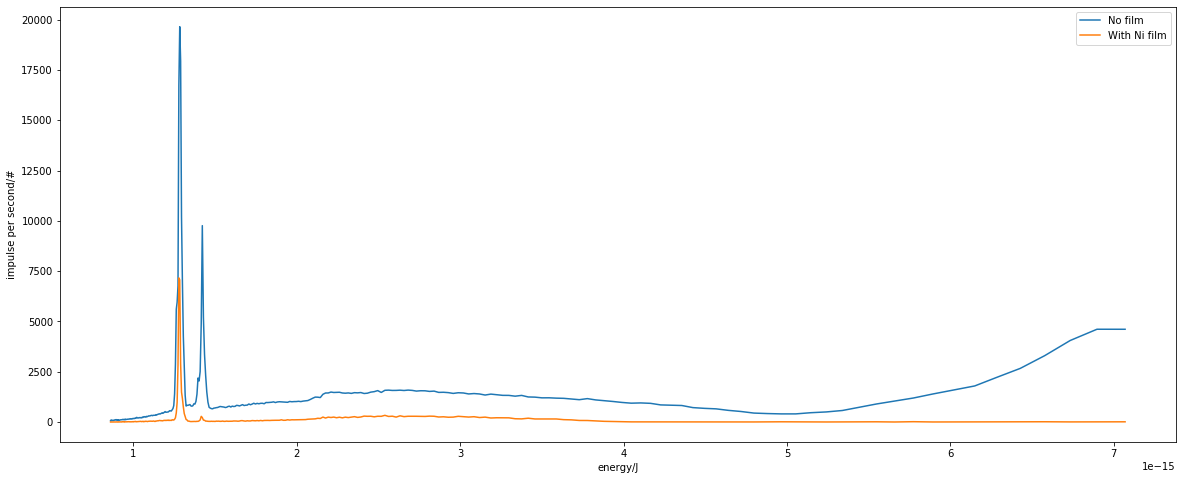

In [15]:
fig_Ni,ax_Ni = plt.subplots(figsize = (20,8))
ax_Ni.plot(energy_plot,back['X-ray (ID 01) / Impulse Imp'],label = "No film")
ax_Ni.plot(energy_plot,ni_film['X-ray (ID 01) / Impulse Imp'], label = "With Ni film")
ax_Ni.set_xlabel('energy/J')
ax_Ni.set_ylabel('impulse per second/#')
ax_Ni.legend()

Text(0.5, 1.0, 'Ag')

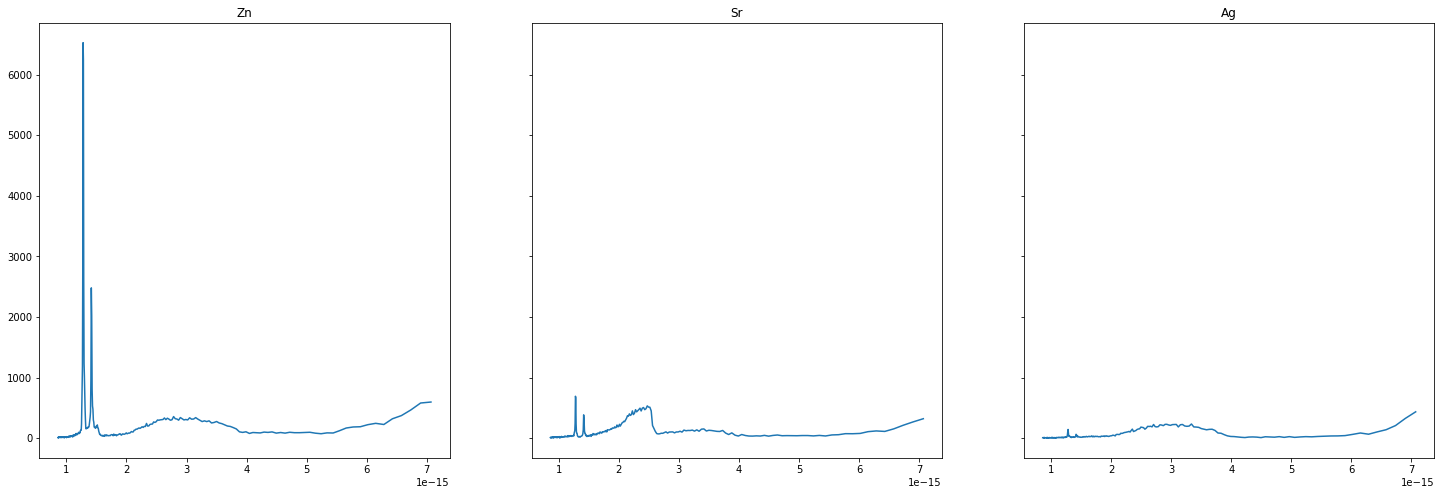

In [16]:
fig,ax = plt.subplots(1,3,figsize = (25,8), sharex = True, sharey = True)
ax[0].plot(energy_plot,zn_p['X-ray (ID 01) / Impulse Imp'])
ax[0].set_title("Zn")
ax[1].plot(energy_plot,sr_p['X-ray (ID 01) / Impulse Imp'])
ax[1].set_title("Sr")
ax[2].plot(energy_plot,ag_p['X-ray (ID 01) / Impulse Imp'])
ax[2].set_title("Ag")

In [17]:
u_zn = -np.log(zn_p['X-ray (ID 01) / Impulse Imp']/back['X-ray (ID 01) / Impulse Imp'])/t_zn
u_sr = -np.log(sr_p['X-ray (ID 01) / Impulse Imp']/back['X-ray (ID 01) / Impulse Imp'])/t_sr
u_ag = -np.log(ag_p['X-ray (ID 01) / Impulse Imp']/back['X-ray (ID 01) / Impulse Imp'])/t_ag


Text(0.5, 1.0, 'Ag')

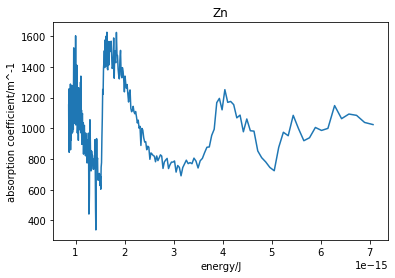

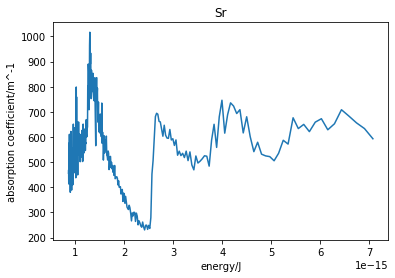

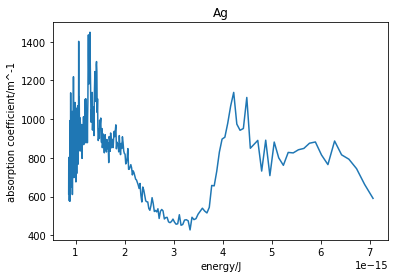

In [18]:
plt.figure()
plt.plot(energy_plot,u_zn)
plt.xlabel("energy/J")
plt.ylabel("absorption coefficient/m^-1")
plt.title("Zn")
plt.figure()
plt.plot(energy_plot,u_sr)
plt.xlabel("energy/J")
plt.ylabel("absorption coefficient/m^-1")
plt.title("Sr")
plt.figure()
plt.plot(energy_plot,u_ag)
plt.xlabel("energy/J")
plt.ylabel("absorption coefficient/m^-1")
plt.title("Ag")

Wonderful they all looked horrifying.

The zig-zagging should be due to poor quality of specimen prepared, so we consider them as noise.

Absorption edge should be associated with the steepest change(increase, since incidence radiation is strongly absorbed) in absorption coefficient.

Text(0.5, 1.0, 'Ag')

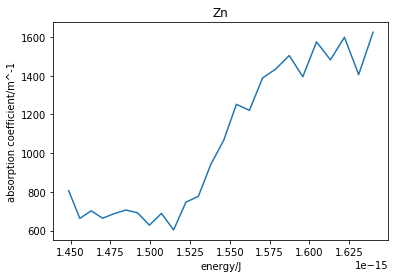

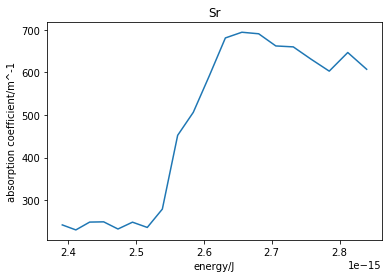

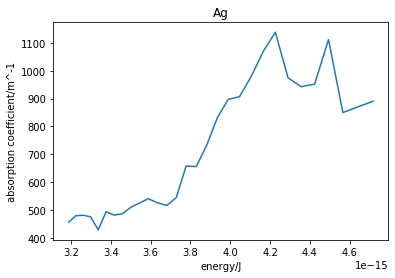

In [19]:
plt.figure()
plt.plot(energy_plot[135:160],u_zn[135:160])
plt.xlabel("energy/J")
plt.ylabel("absorption coefficient/m^-1")
plt.title("Zn")
plt.figure()
plt.plot(energy_plot[60:80],u_sr[60:80])
plt.xlabel("energy/J")
plt.ylabel("absorption coefficient/m^-1")
plt.title("Sr")
plt.figure()
plt.plot(energy_plot[20:50],u_ag[20:50])
plt.xlabel("energy/J")
plt.ylabel("absorption coefficient/m^-1")
plt.title("Ag")

The data itself is already messy enough, so we just eyeball the result.

Zn: $(1.55 \pm 0.05) *10^{-15}$

Sr: $(2.60 \pm 0.07) *10^{-15}$

Ag: $(3.9 \pm 0.4) *10^{-15}$

For K-Shell, the Moseley's Law simplifies to 
$$ E = Rhc(Z-\sigma)^2$$

In [20]:
z_zn = 30
z_sr = 38
z_ag = 47

def Moseley(Z,R,sigma):
    h = 6.62607*(10**(-34))
    c = 2.99792*10**8
    return R*h*c*(Z-sigma)**2

In [21]:
popt,pcov = scipy.optimize.curve_fit(
        Moseley,np.array([30,38,47]),np.array([1.55e-15,2.6e-15,3.9e-15]),sigma = np.array([0.05e-15,0.07e-15,0.4e-15]),p0 = np.array([10973731.6,1]))

In [22]:
print(popt)
print(np.sqrt(pcov[0,0]))
print(np.sqrt(pcov[1,1]))

[1.02825671e+07 2.41226907e+00]
683889.8207613558
1.0592777765908528


The result in standard SI unit is 
$$ R = (1.03 \pm 0.07)*10^7$$
$$ \sigma = 2.4 \pm 1.1 $$

R match with prediction. sigma doesn't.